<a href="https://colab.research.google.com/github/srinivasan-ES/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
class Linear_Regression():

  def __init__(self, learning_rate , no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations =no_of_iterations
  def fit(self , X,Y):

    self.m,self.n =X.shape
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self ):

    Y_prediction = self.predict(self.X)
    dw = - (2*(self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self , X):
    return X.dot(self.w) + self.b


In [11]:
salary_dataset  = pd.read_csv("/content/salary_data.csv")

In [12]:
salary_dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [17]:
X = salary_dataset.drop(columns="Salary",axis=1)

In [20]:
Y=salary_dataset['Salary']

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

In [31]:
print(X_train.shape,X_test.shape)

(29, 1) (1, 1)


In [32]:
model =Linear_Regression(learning_rate =0.022 , no_of_iterations =1000)

In [33]:
model.fit(X_train,Y_train)

In [39]:
prediction  =model.predict(X_test)

In [40]:
print(prediction)


1      37147.872185
0      35226.651246
14     67887.407197
9      60202.523444
21     92863.279395
19     82296.564234
23    103429.994555
6      53478.250160
3      43872.145469
20     89981.447987
dtype: float64


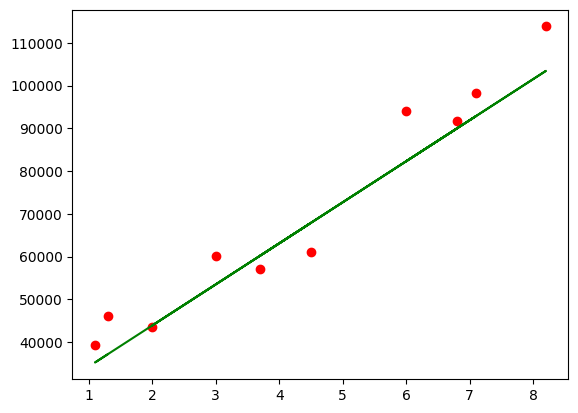

In [44]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,prediction,color='green')